# Машинное обучение и анализ данных

## Математика и Python

Задание 1

In [7]:
import numpy 
    
f = numpy.arange(1, 2, 0.3, dtype=float)
b = numpy.array([1, 2, 3, 4, 5], dtype=float)
# a = numpy.array(1, 2, 3, 4, 5, dtype=float)
c = numpy.array([False, False, True])

In [11]:
c

array([False, False,  True])

In [20]:
import numpy as np

In [13]:
a = numpy.array([0, -1, 11])
b = numpy.array([3, 7, 2])

Дан набор предложений, скопированных из Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

кошки (животные)
UNIX-утилита cat для вывода содержимого файлов
версии операционной системы OS X, названные в честь семейства кошачьих
Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. 
В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

sentences.txt
Выполните следующие шаги:

Скачайте файл с предложениями (sentences.txt).
Каждая строка в файле соответствует одному предложению. 
Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().
Произведите токенизацию, то есть разбиение текстов на слова. 
Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: 
    re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.
Составьте список всех слов, встречающихся в предложениях. 
Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. 
Для этого удобно воспользоваться структурой dict.
Создайте матрицу размера n * d, где n — число предложений. 
Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. 
    У вас должна получиться матрица размера 22 * 254.
Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) 
до всех остальных с помощью функции scipy.spatial.distance.cosine. 
Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? 
Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.
Запишите полученные числа в ответ, разделив пробелом.
Совпадают ли ближайшие два предложения по тематике с первым? 
Совпадают ли тематики у следующих по близости предложений?
Разумеется, использованный вами метод крайне простой. 
Например, он не учитывает формы слов (так, cat и cats он считает разными словами, хотя по сути они означают одно и то же), 
не удаляет из текстов артикли и прочие ненужные слова. 
Позже мы будем подробно изучать анализ текстов, где выясним, как достичь высокого качества в задаче поиска похожих предложений.

In [148]:
import pandas as pd
import numpy as np
import scipy
import re

In [150]:
fname = "/Users/katya/venv/!Projects/stepik/cats.txt" 

with open(fname) as f:
    content = f.readlines()
    print(content[1])
    
content = [re.split("\W+",x.lower().replace("\n", "").replace("\t", "")) for x in content]

content = [[x for x in words if x] for words in content]

dic={}
for word in [item for items in content for item in items]:
    if word in dic:
        dic[word]=dic[word]+1
    else:
        dic[word]=1
        
print(content[0])
word_occur = [[int(kl in content_0) for kl in dic.keys() ] for content_0 in content]
# print(word_occur)
# print(sum(word_occur))
# print(len(word_occur))
# print(len(dic.keys()))     


As cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.

['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process']


In [157]:
dist = [scipy.spatial.distance.cosine(word_occur[0], word_occur[i]) for i in range(len(word_occur))]

In [163]:
dist

[0.0,
 0.9402385695332803,
 0.8619868881315291,
 0.8885443574849294,
 0.8055388829343506,
 0.9402385695332803,
 0.7817821097640076,
 0.9154845745271484,
 0.9069515789601529,
 0.8833576312960392,
 0.8703592552895671,
 0.8703592552895671,
 0.8773721321030068,
 0.8833576312960392,
 0.8663693790437879,
 0.9416788156480196,
 0.8559953917788041,
 0.9519984639262681,
 0.9442721787424647,
 0.9402385695332803,
 0.8427572744917122,
 0.8290591353105431]

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


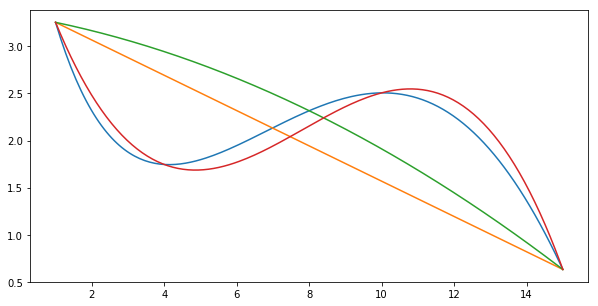

In [182]:
import numpy as np

def get_f(x ):
    return np.sin( x / float(5)) * np.exp(x/float(10)) + 5 * np.exp(-1*x/float(2))

ig, ax = plt.subplots(figsize=(10,5))

x = numpy.linspace(1,15,200)
ax.plot(x, get_f( x))

M_v1 = numpy.array([[1., 1.], [1., 15.]])  
v_v1 = numpy.array([get_f(1),get_f(15)])  

w = numpy.linalg.solve(M_v1, v_v1)

def get_f1(w, x):
    return w[0] + w[1]*x 

ax.plot(x, get_f1(w, x))
#############################################

M_v2 = numpy.array([[1., 1., 1.], [1., 8., 8.*8.], [1.,15.,15.*15.]])  
v_v2 = numpy.array([get_f(1),get_f(8),get_f(15)])  

w_2 = numpy.linalg.solve(M_v2, v_v2)

def get_f2(w, x):
    return w[0] + w[1]*x + w[2]*x**2


ax.plot(x, get_f2(w_2, x))

#############################################

M_v3 = numpy.array([[1., 1., 1., 1.], [1., 4., 4.**2, 4.**3], [1.,10.,10.**2, 10.**3], [1.,15.,15.**2, 15.**3]])  
v_v3 = numpy.array([get_f(1),get_f(4),get_f(10), get_f(15)])  

w_3 = numpy.linalg.solve(M_v3, v_v3)

def get_f3(w, x):
    return w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3 


ax.plot(x, get_f3(w_3, x))

print(w_3)

plt.show()
